In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed,FloatSlider
import pandas as pd
from mpl_toolkits.mplot3d import axes3d



plt.rcParams["figure.figsize"] = [10, 10]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,arange,array,linspace,meshgrid

from scipy.integrate import quad,dblquad

def stripes(lev,a,b,c,d,steps=100):
    """Finds subitervals of [a,b] where
    c(x) <= lev <= d(x)
    for each x in the subinterval.
    
    Returns: list of tuples (x_i,y_i)"""
#     on = False 
    out = []
    tmp = []
    for i in np.linspace(a,b,steps):
        if c(i) <= lev <= d(i):
            xi = i
            if not tmp:
                tmp.append(xi)
        else:
            if tmp:
                out.append((tmp[0],xi))
                tmp = []
    if tmp:
        out.append((tmp[0],xi))
        tmp = []
    return out

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## Commissions

Find parametrizations to model the following surfaces, as best you can. 

<span><img src="https://images-na.ssl-images-amazon.com/images/I/91FzIp4UdjL._AC_SX425_.jpg" alt="an American football" width=30%> 

<!-- ![An American football](https://images-na.ssl-images-amazon.com/images/I/91FzIp4UdjL._AC_SX425_.jpg)

![A French bugle](https://www.jimlaabsmusicstore.com/wp-content/plugins/wp-easycart-data/products/pics1/Single%20French%20Horn%20(1)_fa8fdee99bc29ef687d82213a946e1d3.jpg) -->

In [13]:

@interact
def _(angle=(-96,186,6)):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    u = linspace(-pi/2,pi/2,66)
    v = linspace(0,2*pi,66)
    u,v = meshgrid(u,v)
    r = 3/4
    ax.plot_surface(u,r*cos(u)*cos(v),r*cos(u)*sin(v),color=(.1,1,.4,.5))
    ax.plot_wireframe(u,r*cos(u)*cos(v),r*cos(u)*sin(v),color='k',rcount=10,ccount=10)
    ax.view_init(39,angle)
    ax.set_ylim((-pi/2,pi/2));
    ax.set_zlim((-pi/2,pi/2));

interactive(children=(IntSlider(value=42, description='angle', max=186, min=-96, step=6), Output()), _dom_clas…

<img src="https://www.jimlaabsmusicstore.com/wp-content/plugins/wp-easycart-data/products/pics1/Single%20French%20Horn%20(1)_fa8fdee99bc29ef687d82213a946e1d3.jpg" alt="a French bugle" width="30%"></span>

In [43]:

@interact
def _(angle=(-96,186,6),vangle=(-96,186,6)):
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca(projection='3d')

    # coil
    U = linspace(0,18*pi/4,300)
    V = linspace(0,2*pi,66)
    u,v = meshgrid(U,V)
    r = 2**(-u/10)/8
    uu = u*4/(9*pi) - 1
    rise = uu*(uu**2-1)**2/3
    surf = (cos(u)*(1+ + r*cos(v)),sin(u)*(1 + r*cos(v)),r*sin(v) + rise)
    ax.plot_surface(*surf,color=(.1,1,.4,.7))
#     ax.plot_wireframe(*surf,color='k',rcount=6,ccount=6)
    
    # mouth piece
    U=linspace(0,1,10)
    u,v=meshgrid(U,V)
    r = 2**(-9*pi/20)/8
    surf = (-1.3*u,1 + r*cos(v), r*sin(v))
    ax.plot_surface(*surf,color=(.1,1,.4,.7))
#     ax.plot_wireframe(*surf,color='k',rcount=6,ccount=6)
    
    # bell
    U=linspace(0,1,50)
    u,v=meshgrid(U,V)
    r = 2**(u/10)/8 + u**2/2
    surf = (1 + r*cos(v), -1.4*u ,r*sin(v))
    ax.plot_surface(*surf,color=(.1,1,.4,.7))
#     ax.plot_wireframe(*surf,color='k',rcount=6,ccount=6)
    
    ax.view_init(vangle,angle)
    ax.set_xlim((-pi/2,pi/2));
    ax.set_ylim((-pi/2,pi/2));
    ax.set_zlim((-pi/2,pi/2));

interactive(children=(IntSlider(value=42, description='angle', max=186, min=-96, step=6), IntSlider(value=42, …

### Exercise

Make a small group and collaborate on producing one of the following or other surface of your choice. You can use [CalcPlot3D](https://www.monroecc.edu/faculty/paulseeburger/calcnsf/CalcPlot3D/).

![Egg crate foam mattress](https://images-na.ssl-images-amazon.com/images/I/71TPtcfCM8L._AC_SX425_.jpg)

![butterfly yoyo](https://flamesngames.co.uk/wp-content/uploads/2016/12/Duncan_YoYo_Butterfly_XT_3514XP-RD1-a.png)



## Example

Find the surface area of the part of the plane $z=x+2$ inside the cylinder $x^2+y^2=1$.

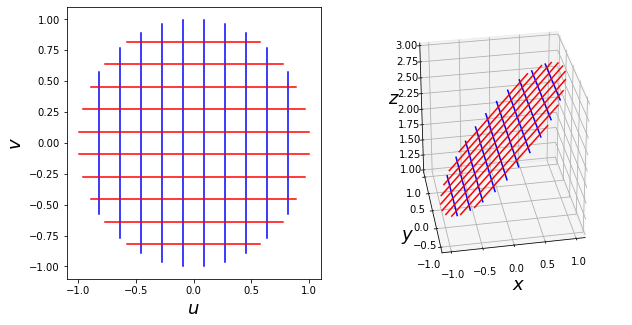

In [21]:
fig= plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')
u = v = np.linspace(-1,1,12)
r = lambda u,v: np.array([u,v,u+2])

ax1.set_xlabel('$u$',fontsize=18)
ax1.set_ylabel('$v$',fontsize=18)

ax2.set_xlabel('$x$',fontsize=18)
ax2.set_ylabel('$y$',fontsize=18)
ax2.set_zlabel('$z$',fontsize=18)

for i in u:
    ax1.plot(i*np.ones_like(v),v*sqrt(1-i**2),'b')
#     ax2.plot(i*np.ones_like(v),v*sqrt(1-i**2),'b',alpha=.5)
    ax2.plot(*r(i*np.ones_like(v),v*sqrt(1-i**2)),'b')
for i in v:
    ax1.plot(u*sqrt(1-i**2),i*np.ones_like(u),'r')
#     ax2.plot(u*sqrt(1-i**2),i*np.ones_like(u),'r',alpha=.5)
    ax2.plot(*r(u*sqrt(1-i**2),i*np.ones_like(u)),'r')

ax2.view_init(30,-135)
    
u,v = np.meshgrid(u,v)
# ax2.plot_wireframe(*r(u,v),color=('r','b'),rcount=10,ccount=10);


## Example

Find the surface area of the part of the plane $z=x+2$ inside the cylinder $x^2+y^2=1$.

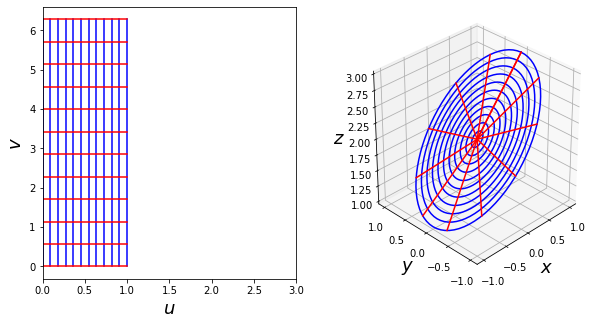

In [19]:
fig= plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')
u = np.linspace(0,1,77)
v = np.linspace(0,2*pi,77)
r = lambda u,v: np.array([u*cos(v),u*sin(v),u*cos(v)+2])
ax1.set_xlabel('$u$',fontsize=18)
ax1.set_ylabel('$v$',fontsize=18)

ax1.set_xlim((0,3))

ax2.set_xlabel('$x$',fontsize=18)
ax2.set_ylabel('$y$',fontsize=18)
ax2.set_zlabel('$z$',fontsize=18)

for i in np.linspace(0,1,12):
    ax1.plot(i*np.ones_like(v),v,'b')
#     ax2.plot(i*cos(v),i*sin(v),0,'b',alpha=.5)
    ax2.plot(*r(i*np.ones_like(v),v),'b')
for i in np.linspace(0,2*pi,12):
    ax1.plot(u,i*np.ones_like(u),'r')
#     ax2.plot(u*cos(i),u*sin(i),0,'r',alpha=.5)
    ax2.plot(*r(u,i*np.ones_like(u)),'r')

ax2.view_init(30,-135)
    
u,v = np.meshgrid(u,v)
# ax2.plot_wireframe(*r(u,v),color=('r','b'),rcount=10,ccount=10);


### Example

Suppose a triangular chip is modeled as the piece of the plane $x+ y+ z = 1$ in the first octant with density $\rho(x,y,z) = 2-z$ (in mass per unit area). Find the mass of the chip. 

In [4]:

@interact
def _(angle=(-96,186,6)):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    u = linspace(0,1)
    v = linspace(0,1)
    u,v = meshgrid(u,v)
    ax.plot_surface(u,(1-u)*v,1-u - (1-u)*v,color=(.1,1,.4,.5))
    ax.plot_wireframe(u,(1-u)*v,1-u - (1-u)*v,color='k',rcount=10,ccount=10)
    ax.view_init(39,angle)
    ax.set_zlim((0,1));

interactive(children=(IntSlider(value=42, description='angle', max=186, min=-96, step=6), Output()), _dom_clas…

### Example

You are a scientist ar NORAD and get a tip that a UFO will be landing tonight "somewhere in the northern hemisphere". What is the expected latitude of its landing site?

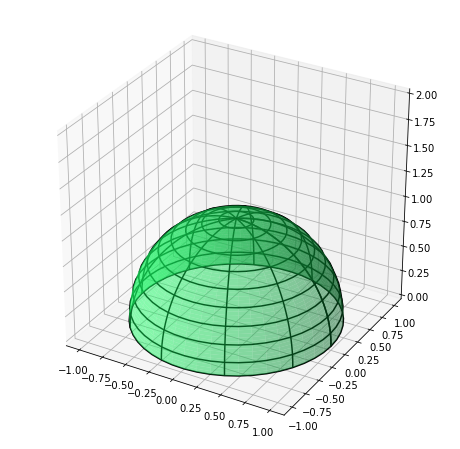

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
u = linspace(0,pi/2)
v = linspace(0,2*pi)
u,v = meshgrid(u,v)
ax.plot_surface(sin(u)*cos(v),sin(u)*sin(v),cos(u),color=(.1,1,.4,.5))
ax.plot_wireframe(sin(u)*cos(v),sin(u)*sin(v),cos(u),color='k',rcount=10,ccount=10)
ax.set_zlim((0,2));